인스타그램 로그인

In [4]:
from selenium import webdriver
driver = webdriver.Chrome('C:\chrome\chromedriver.exe')
import time

driver.get('http://www.instagram.com')
time.sleep(2)

In [5]:
import time
email = 'erdosnumber0@gmail.com' ## < 아이디 수정해서 입력 >
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = 'qpqp1010' ## < 비밀번호 수정해서 입력 >
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)

인스타 검색 결과 URL

In [6]:
def insta_searching(word):
    url = 'https://instagram.com/explore/tags/' +word
    return url

In [7]:
word = '취미운동'
url = insta_searching(word)
driver.get(url)

In [8]:
def select_first(driver):
    first = driver.find_element_by_css_selector('div._9AhH0')
    first.click()
    time.sleep(3)
    
select_first(driver)

게시글 정보 가져오기

In [16]:
import re
from bs4 import BeautifulSoup
import unicodedata

def get_content(driver):
    # 현재 페이지 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    # 본문 내용 가져오기
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC', content)
        content = re.sub(r"[^ㄱ-ㅎ|ㅏ-ㅣ|가-힣|A-Z|a-z|0-9|.|,|#| ]", " ", content)
    except:
        content = ' '
    # 본문 내용에서 해시태그 가져오기(정규식 활용)
    tags = re.findall(r'#[^\s#,\\]+', content)  
    
    # 작성일자 정보 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    # 좋아요 수 가져오기
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
    except:
        like = 0
    # 위치정보 가져오기
    try: 
        place = soup.select('div.M30cS')[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
    # 수집한 정보 저장하기
    data = [content, date, like, place, tags]
    return data

get_content(driver)

[' Happy Healing Day  5.12KM 설숲 뛰고 갈비때려먹기 아침부터 하루종일 행복한 하루였어요축하해주셔서 고맙습니다   #HBD #0512 #러너국룰 #생일런  ',
 '2021-05-12',
 0,
 '서울숲 Seoul Forest Park',
 ['#HBD', '#0512', '#러너국룰', '#생일런']]

다음 게시글 열기

In [14]:
def move_next(driver):
    right=driver.find_element_by_css_selector('a.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)
    
move_next(driver)

여러 개시글 정보 수집하기

- 크롬 브라우저 열기
- 인스타그램 검색 페이지 url 만들기
- 검색페이지 접속하기
- 첫 번째 게시물 클릭하기
- 비어있는 변수 만들기(results)
- 게시글 정보 가져오기 get_content()사용자 함수
- 게시글 정보 변수(results)에 추가하기 -> 다음 게시글 (반복)
- 게시글 정보 수집 완료(results)

In [3]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

# 크롬 브라우저 열기
driver = webdriver.Chrome('C:\chrome\chromedriver.exe') 

# 추가) 인스타그램 접속후, 로그인 하기  - 
driver.get('http://www.instagram.com')
time.sleep(3)


######## 인스타 계정 로그인이 필요합니다 #########
email = '<계정입력>'   ### 계정 정보 수정 필요
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = '<비번 입력>' ### 비번 정보 수정 필요
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()

취미 운동

In [17]:
# 인스타그램 검색페이지 URL 만들기
word = "취미운동"    #검색어
url = insta_searching(word)

# 검색페이지 접속하기
driver.get(url)
time.sleep(3)

# 첫 번째 게시글 열기
select_first(driver)

# 비어있는 변수(results)만들기
results = [ ]


#여러 게시물 수집하기
target = 200      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
    

print(results[:2])

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"a.coreSpriteRightPaginationArrow"}
  (Session info: chrome=90.0.4430.212)


In [18]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.drop_duplicates(subset = ['content'], inplace=True)
results_df.to_excel('./dataset/1_crawling_exercise.xlsx',index=False)


In [19]:
results_df.head()

,content,data,like,place,tags
0,Happy Healing Day 5.12KM 설숲 뛰고 갈비때려먹기 아침부터 하...,2021-05-12,0,서울숲 Seoul Forest Park,"[#HBD, #0512, #러너국룰, #생일런]"
1,값진 시간이 였다 감사합니다열심히 하겠습니다국기원 경기분과 위원 위촉 가온은 사...,2021-04-11,0,가온 태권도장 태권핏,"[#서울성인태권도, #신촌성인태권도, #홍대성인태권도, #마포구성인태권도, #서대문..."
2,오픈워터의 중성부력 gr.eeeeeny ...,2021-03-31,0,K26,"[#saltydiving, #getsalty, #staysalty, #취미운동]"
3,"민채고 써벨로s시리즈, p시리즈 자전거이름짓기 이벤트 당첨자 발표 예상보다 ...",2021-01-14,0,압구정토끼굴,[]
4,프리다이빙 스쿠버다이빙 교육 교육 후에도...,2021-04-04,0,K26,"[#취미운동, #bpfreediving, #saltydiving, #getsalty..."


In [20]:
import pandas as pd
df =pd.read_excel('./dataset/1_crawling_exercise.xlsx')
df['tags'][:3] # 3줄만 확인

0                   ['#HBD', '#0512', '#러너국룰', '#생일런']
1    ['#서울성인태권도', '#신촌성인태권도', '#홍대성인태권도', '#마포구성인태권...
2    ['#saltydiving', '#getsalty', '#staysalty', '#...
Name: tags, dtype: object

In [21]:
tags_total = []

for tags in df['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag) # for 문으로 tag_total 리스트에 추가

In [22]:
from collections import Counter
tag_counts = Counter(tags_total) # 그룹 내 원소의 종류별로 빈도서 집계

In [23]:
tag_counts.most_common(50)

[('#취미운동', 99),
 ('#운동하는여자', 33),
 ('#운동', 31),
 ('#운동스타그램', 30),
 ('', 28),
 ('#폴댄스', 27),
 ('#다이어트', 23),
 ('#취미', 20),
 ('#poledance', 16),
 ('#취미스타그램', 13),
 ('#볼더링', 13),
 ('#취미생활', 12),
 ('#클라이밍', 11),
 ('#일상', 11),
 ('#대한폴댄스연맹', 11),
 ('#취미생활추천', 10),
 ('#운동하는남자', 10),
 ('#운동기록', 10),
 ('#직장인운동', 9),
 ('#취미활동', 8),
 ('#더클라임', 8),
 ('#폴댄스학원', 8),
 ('#폴린이', 8),
 ('#폴웨어', 8),
 ('#헬스', 8),
 ('#취미반', 7),
 ('#테니스', 7),
 ('#테니스레슨', 7),
 ('#맞팔', 7),
 ('#climbing', 7),
 ('#kbpf', 7),
 ('#취미사진', 6),
 ('#취미미술', 6),
 ('#취미발레', 6),
 ('#취미그램', 6),
 ('#취미그림', 6),
 ('#취미모델', 6),
 ('#취미클래스', 6),
 ('#취미생활그램', 6),
 ('#취미미술확원', 6),
 ('#취미사진가', 6),
 ('#취미미술화실', 6),
 ('#취미추천', 6),
 ('#취미공유', 6),
 ('#취미부자', 6),
 ('#취미피아노', 6),
 ('#취미자수', 6),
 ('#취미요리', 6),
 ('#취미반클래스', 6),
 ('#취미도예', 6)]

In [24]:
# 데이터 정제하기
STOPWORDS = ['','#취미운동','#운동하는여자','#운동', '#운동스타그램','#취미', '취미스타그램','취미생활', '#일상',
            '#대한폴댄스연맹', '#취미생활추천', '#운동하는남자', '#운동기록', '#직장인운동', '#취미활동', '#폴댄스학원', 
             '#맞팔']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)


[('#폴댄스', 27),
 ('#다이어트', 23),
 ('#poledance', 16),
 ('#취미스타그램', 13),
 ('#볼더링', 13),
 ('#취미생활', 12),
 ('#클라이밍', 11),
 ('#더클라임', 8),
 ('#폴린이', 8),
 ('#폴웨어', 8),
 ('#헬스', 8),
 ('#취미반', 7),
 ('#테니스', 7),
 ('#테니스레슨', 7),
 ('#climbing', 7),
 ('#kbpf', 7),
 ('#취미사진', 6),
 ('#취미미술', 6),
 ('#취미발레', 6),
 ('#취미그램', 6),
 ('#취미그림', 6),
 ('#취미모델', 6),
 ('#취미클래스', 6),
 ('#취미생활그램', 6),
 ('#취미미술확원', 6),
 ('#취미사진가', 6),
 ('#취미미술화실', 6),
 ('#취미추천', 6),
 ('#취미공유', 6),
 ('#취미부자', 6),
 ('#취미피아노', 6),
 ('#취미자수', 6),
 ('#취미요리', 6),
 ('#취미반클래스', 6),
 ('#취미도예', 6),
 ('#취미화실', 6),
 ('#취미꽃꽂이', 6),
 ('#취미생활중', 6),
 ('#실내운동', 6),
 ('#헬린이', 6),
 ('#bouldering', 6),
 ('#근력운동', 6),
 ('#poledancer', 6),
 ('#서울성인태권도', 5),
 ('#신촌성인태권도', 5),
 ('#홍대성인태권도', 5),
 ('#마포구성인태권도', 5),
 ('#서대문구성인태권도', 5),
 ('#태권도배우기', 5),
 ('#태권도하는성인들', 5)]

막대 차트

In [27]:
# 시각화 라이브러리 호출 및 환경 설정(한글 폰트) - 한글 깨지지 않게
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)


In [28]:
# 데이터 준비하기
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

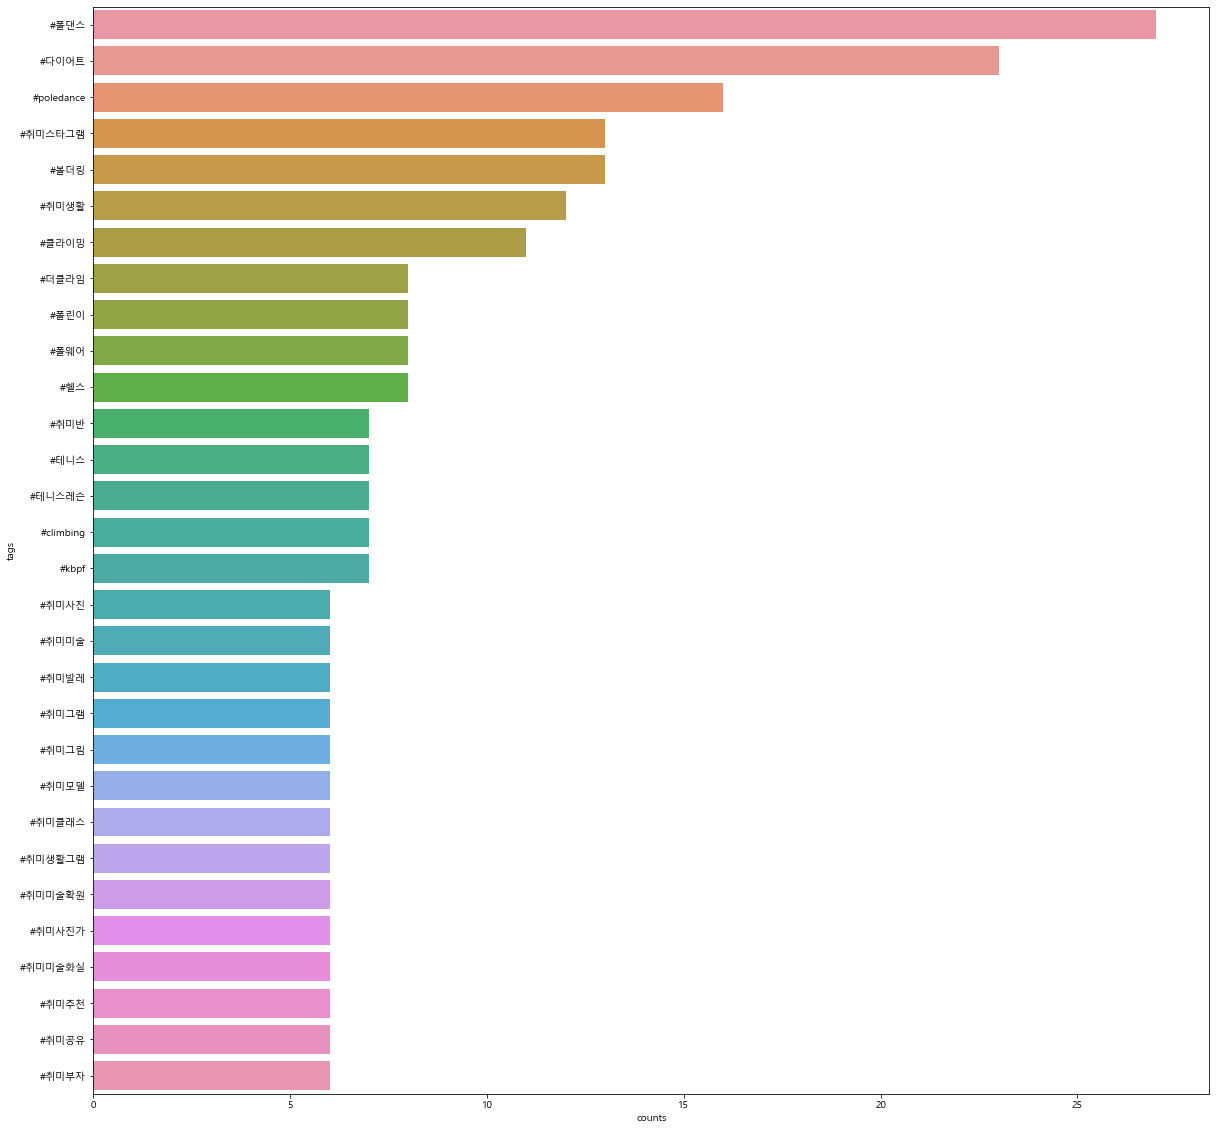

In [29]:
# 막대 차트 그리기
plt.figure(figsize=(20,20)) 
sns.barplot(x='counts', y='tags', data = tag_counts_df)

In [15]:
pip install wordcloud

In [30]:
# 워드클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt
from wordcloud import WordCloud    # 에러시  ! pip install wordcloud 실행
import platform

if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"


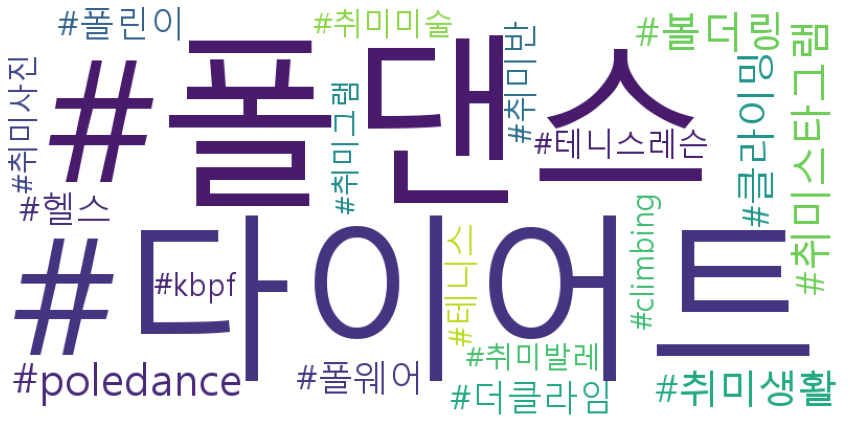

In [32]:
# 워드클라우드 만들기
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=20,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_counts_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./dataset/2_tag-wordcloud.png')  